<a href="https://colab.research.google.com/github/jinyingtld/python/blob/main/AI6126_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
import torchvision

from torch import nn

# Convolutional layer in PyTorch 

## Conv2d
CLASS torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0,dilation=1, groups=1,bias=True,padding_mode='zeros'

Applies a 2D convolution over an input signal composed of several input planes.

In the simplest case, the output value of the layer with input size (N, Cin,H,W) and output (N, Cout,Hout,Wout) can be precisely described as:

>out($N_{i},C_{out_{j}})=bias(C_{out_{j}}+\sum^{C_{in} -1}_{k=0}weight(C_{out_{j}},k)*input(N_{i},k)$ 

where * is the valid 2D ccross-correlation operator, N is a batch size, C denotes a number of channels, H is a height of input planes in pixels, and W is width in pixels.

* ***stride*** control the stride for the cross-correlation,a single number or a tuple.
* ***padding*** controls the amount of implicit zero-paddings on both sides for padding number of points for each dimension.
* ***dilation*** controls the spacing between the kernel points; also known as the a trous algorithm, it is harder to describe, but this link has a nice visualization of what dilation does. 
* ***groups*** controls the connections between inputs and outputs. in_channels and out_channels must both be divisible by groups. For example, 
    >- At groups=1, all inputs are convolved to all outputs 
    >- At groups=2, the operation becomes equivalent to having two conv layers side by side, each seeing half the input channels,and producing half the output channels,and both subsequently concatenated
    >- At groups=in_channels, each input channel is convolved with its own set of filters, of size:[$\frac{out\\_channel}{in\\_channel}$]

The parameters ***kernel_size***,***stride***,***padding***,***dilation**** can either be:
    
        * a single int - in which case the same value is used for the height and width dimension
        * a tuple of two ints - in which case, the first int is used for the height dimension, and the second int for the width dimension
            

In [19]:
# ?nn.Conv2d

# with square kernels and equal stride
m = nn.Conv2d(16, 33, 3, stride=2)
# non-square kernels and unequal stride and with padding 
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2)) 
# non-square kernels and unequall stride and with padding and dilation 
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1)) # dilation result will 
# controls output size
input = torch.randn(20, 16, 50, 100)  # 20: N 16:Cin 50:H 100:W
print(input.size())
output = m(input)
print(output.size())

torch.Size([20, 16, 50, 100])
torch.Size([20, 33, 28, 100])


In [11]:
# ?torch.randn

# MaxPool2d

CLASS torch.nn.MaxPool2d(kernel_size,stride=None,padding=0,dilation=1,return_indices=False,ceil_mode=False)

Applies a 2D max pooling over an input signal composed of several input planes.

In the samplest case, the output value of the layer with input size (N,C,H,W), output(N,C,Hout,Wout) and kernel_size(kH,kW) can be precisely describbed as:
>out($N_{i},C_{out_{j}})=max_{m=0,...,kH-1}max_{n=0,...,kW-1}input(N_{i},C_{j},stride[0]\\X\space h+m,stride[1]\\X \space w+n$

If padding is non-zero, then the input is implicitly zero-padded on both sides for padding number of points. dilation controls the spacing between the kernel points. It is harder to describe, but this link has a nice visualization of what dilation does. 

The parameters kernel_size, stride, padding, dilation can either be:

        * a single int - in which case the same value is used for the height and width dimension
        * a tuple of two ints - in which case, the first int is used for the height dimension, and the second int for the width dimension

In [23]:
# pool of square window of size=3, stride=2
m = nn.MaxPool2d(3, stride=2)
# pool of non-square window
m = nn.MaxPool2d((3, 2), stride=(2, 1))
input = torch.randn(20, 16, 50, 32)
print(input.size())
output = m(input)
print(output.size())

torch.Size([20, 16, 50, 32])
torch.Size([20, 16, 24, 31])


# AvgPool2d

CLASS torch.nn.AvgPool2d(kernel_size,stride=None,padding=0,ceil_mode=False,count_include_pad=True,divisor_override=None)

Applies a 2D average pooling over an input signal composed of several input planes.

In the samplest case, the output value of the layer with input size (N,C,H,W), output(N,C,Hout,Wout) and kernel_size(kH,kW) can be precisely describbed as:
>out($N_{i},C_{out_{j}})=\frac{1}{kH * kW}\sum^{kH-1}_{m=0}\sum^{kW-1}_{n=0}input(N_{i},C_{j},stride[0]\\X\space h+m,stride[1]\\X \space w+n$

If padding is non-zero, then the input is implicitly zero-padded on both sides for padding number of points. 

The parameters kernel_size, stride, padding, dilation can either be:

        * a single int - in which case the same value is used for the height and width dimension
        * a tuple of two ints - in which case, the first int is used for the height dimension, and the second int for the width dimension

In [24]:
# pool of square window of size=3, stride=2
m = nn.AvgPool2d(3, stride=2)
# pool of non-square window
m = nn.AvgPool2d((3, 2), stride=(2, 1))
input = torch.randn(20, 16, 50, 32)
print(input.size())
output = m(input)
print(output.size())

torch.Size([20, 16, 50, 32])
torch.Size([20, 16, 24, 31])


# Linear 
CLASS torch.nn.Linear(in_features,out_features,bias=True)

Applies a linear transformation to the incoming data: $y=xA^{T}+b$

>Parameteres
>- in_features - size of each input sample
>- out_features - size of each output sample
>- bias - If set to False, the layer will not learn an additive bias. Default: True

>Shape:
>- Input:$(N,*,H_{in})$ where * means any number of additional dimensions and $H_{in}=in\_features$
>- Output:$(N,*,H_{out})$ where all but the last dimension are the same shape as the input and $H_{out}=out\_features$

>Variables
>- ***~Linear.weight*** - the learnable weights of the module of shape(out_features, in_features). The values are initialized from $u(-\sqrt{k},\sqrt{k})$,where $k = \frac{1}{in\_features}$

>- ***~Linear.bias*** - the leanable bias of the module of shape(out_features). if bias is True, the values are initialized from $u(-\sqrt{k},\sqrt{k})$,where $k = \frac{1}{in\_features}$


In [29]:
# padding.ipynb
# Install PyTorch and Torchvision

# !pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

torch.__version__

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision 
import torchvision.transforms as transforms 



In [30]:
m = nn.ZeroPad2d(2)

In [31]:
input = torch.randn(1,1,3,3)

In [32]:
input

tensor([[[[-1.2302,  0.2768,  1.7490],
          [-0.3340, -0.1988, -0.1093],
          [-0.3426, -0.0642, -0.5851]]]])

In [33]:
m(input)

tensor([[[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000, -1.2302,  0.2768,  1.7490,  0.0000,  0.0000],
          [ 0.0000,  0.0000, -0.3340, -0.1988, -0.1093,  0.0000,  0.0000],
          [ 0.0000,  0.0000, -0.3426, -0.0642, -0.5851,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]]]])

# MNIST with PyTorch 
In this notebook example, we will walk through how to train a simple CNN to classify MNIST images. 

We will rely on the following modules,including torch and torchvision.

In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
# !pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

In [36]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt 


# 1. Data Loader 
The first step is to create a data loader.
A data loader can be treated as a list (or iterator, technically). Each time it will provide a minibatch of (img, label) pairs.

In [53]:
# Choose a dataset -- MNIST for example
train_set = datasets.MNIST(root='./data', train=True,download=True)
test_set = datasets.MNIST(root='./data', train=False,download=True)

train_set.transform = transform=transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.1307,),(0.3081,))                    
                    ])

test_set.transform = transform=transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.1307,), (0.3081,))                               
                    ])

# Create a data loader 
train_loader = DataLoader(train_set,batch_size=64, shuffle=True)
test_loader = DataLoader(test_set,batch_size=64, shuffle=False)

In [49]:
!ls -l ./data/MNIST/raw
# ?transforms.Compose
# ??transforms.Normalize

total 65008
-rw-r--r-- 1 root root  7840016 Jan 31 06:58 t10k-images-idx3-ubyte
-rw-r--r-- 1 root root  1648877 Jan 31 06:58 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    10008 Jan 31 06:58 t10k-labels-idx1-ubyte
-rw-r--r-- 1 root root     4542 Jan 31 06:58 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 root root 47040016 Jan 31 06:58 train-images-idx3-ubyte
-rw-r--r-- 1 root root  9912422 Jan 31 06:58 train-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    60008 Jan 31 06:58 train-labels-idx1-ubyte
-rw-r--r-- 1 root root    28881 Jan 31 06:58 train-labels-idx1-ubyte.gz


Let us show some of the training images, for fun.

torch.Size([64, 1, 28, 28])


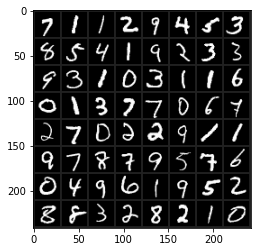

Gt	: 7 1 1 2 9 4 5 3 8 5 4 1 9 2 3 3 9 3 1 0 3 1 1 6 0 1 3 7 7 0 6 7 2 7 0 2 2 9 1 1 9 7 8 7 9 5 7 6 0 4 9 6 1 9 5 2 8 8 3 2 8 2 1 0


In [56]:
def imshow(img, mean=0, std=1):
    img = img * std + mean # unnormalize 
    npimg = img.numpy().transpose(1, 2, 0).squeeze() # c(c, h, w) -> (h, w, c)
    plt.imshow(npimg)
    plt.show()

trainiter = iter(train_loader)
img, label = trainiter.next()
print(img.shape) # (n,c,h,w)

# Visualization 
img = torchvision.utils.make_grid(img)
imshow(img, 0.1307, 0.3081)
print('Gt\t:', ' '.join('%d' % label[j].item() for j in range(len(label))))

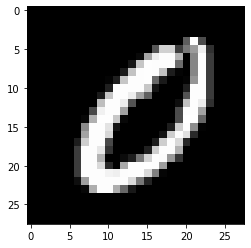

In [59]:
# To check a single random image

trainiter = iter(train_loader)
img, label = trainiter.next()
plt.imshow(img[0].reshape(28,28), cmap="gray")

# 2. Model 
The second step is to define our model.

We will use a simple CNN with conv(5X5) -> relu -> pool(2x2) -> conv(5X5) -> relu -> pool(2x2) ->fc(200) -> relu -> fc(10).

In PyTorch, a model is defined by a subclass of nn.Module. It has two methods: 
>- \__init__:constructor. Create layers here. Note that we don't define the connections between layers in this function.
>- forward(x): forward function. Receives an input variable x. Returns a output variable. Note that we actually connect the layers here dynamically.

We no longer need to implement the backward function. The computational graph will be built implicitly based on the forward operations, and the gradients can be automatically computed. 


In [60]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__() # Call parent class's constructor 
        self.conv1 = nn.Conv2d(1, 10, 5, 1) # (in_channel, out_channel,kenel_size,stride)
        self.conv2 = nn.Conv2d(10, 20, 5, 1) # (in_channel, out_channel,kenel_size,stride)
        self.pool = nn.MaxPool2d(2) # kernel_size=2
        self.fc1 = nn.Linear(4*4*20, 200) # in_features, out_features
        self.fc2 = nn.Linear(200, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.conv1(x) # Hout=(28-5)/1 +1 = 24, Hout X Wout = 24 * 24 Cout=10
        x = self.relu(x)
        x = self.pool(x) # (24-2)/2 + 1 = 12 , Hout*Wout = 12*12 Cout=10
        x = self.conv2(x) # (12-5)/1 + 1 = 8  Hout*Wout = 8*8 Cout=20
        x = self.relu(x)
        x = self.pool(x) # (8-2)/2 + 1 = 4 , Hout*Wout = 4*4 Cout=20
        x = x.view(-1, 4*4*20) # Flatten the data
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model  = SimpleCNN()

You can double check your model specification. 

In [62]:
# print(model)



SimpleCNN(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=320, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=10, bias=True)
  (relu): ReLU()
)


Let us test with random inputs.

In [66]:
x = torch.rand([64, 1, 28, 28])
x.shape

torch.Size([64, 1, 28, 28])

In [65]:
y = model(x)
print(y.shape)

torch.Size([64, 10])


# 3. Loss and Optimizer 
The third step is to define the loss function and the optimization algorithm. let's use a Classification Cross-Entropy loss and SGD with momentum.